# Visualize Results of Matching Runs from IND Runs with extra processing 2

## Import in data from runs

In [1]:
import pandas as pd

In [3]:
data_df = pd.read_csv('ind_match_runs_12_12.csv')

In [4]:
data_df['settings_file'].unique()

array(['dedupe_extension/settings_IND_0',
       'dedupe_extension/settings_IND_1',
       'dedupe_extension/settings_IND_2',
       'dedupe_extension/settings_IND_3',
       'dedupe_extension/settings_IND_4',
       'dedupe_extension/settings/settings_IND_0',
       'dedupe_extension/settings/settings_IND_1',
       'dedupe_extension/settings/settings_IND_2',
       'dedupe_extension/settings/settings_IND_3',
       'dedupe_extension/settings/settings_IND_4'], dtype=object)

In [5]:
data_df.shape

(80, 14)

In [6]:
data_df_2 = data_df[data_df['processing'] != 1]

In [7]:
data_df_2.shape

(55, 14)

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linspace

In [49]:
files = [['dedupe_extension/settings_IND_0','settings_IND_0 orig'],
         ['dedupe_extension/settings_IND_1','settings_IND_1 orig'],
         ['dedupe_extension/settings_IND_2','settings_IND_2 orig'],
         ['dedupe_extension/settings_IND_3','settings_IND_3 orig'],
         ['dedupe_extension/settings_IND_4', 'settings_IND_4 orig'],
         ['dedupe_extension/settings/settings_IND_4','settings_IND_4 extra 2'],
         ['dedupe_extension/settings/settings_IND_3','settings_IND_3 extra 2'],
         ['dedupe_extension/settings/settings_IND_2','settings_IND_2 extra 2'],
         ['dedupe_extension/settings/settings_IND_1','settings_IND_1 extra 2'],
         ['dedupe_extension/settings/settings_IND_0','settings_IND_0 extra 2']]

In [50]:
start = 0.0
stop = 1.0
number_of_lines= len(files)
cm_subsection = linspace(start, stop, number_of_lines) 
colors = [ cm.bwr(x) for x in cm_subsection ]

In [53]:
ratio_sets = []
for i, file in enumerate(files):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    ratio_sets.append([data_cut['total_donors'].values, data_cut['donor_cluster_ratio'].values, file[1], color])

In [54]:
ratio_sets

[[array([ 65753, 123946, 226790, 317552, 402157, 480824]),
  array([23.73754513, 15.80943878, 11.33043565,  9.84748969,  9.14554386,
          8.59135904]),
  'settings_IND_0 orig',
  (0.0, 0.0, 1.0, 1.0)],
 [array([123946, 123946, 226790, 317552, 402157, 480824]),
  array([15.2473859 , 15.27933925, 11.18293886,  9.86645953,  9.07537292,
          8.60319562]),
  'settings_IND_1 orig',
  (0.2196078431372549, 0.2196078431372549, 1.0, 1.0)],
 [array([ 65617, 123946, 226790, 317552, 402157, 480824]),
  array([25.51205288, 16.35171504, 11.64518614, 10.11215489,  9.35858233,
          8.79470296]),
  'settings_IND_2 orig',
  (0.4392156862745098, 0.4392156862745098, 1.0, 1.0)],
 [array([123946, 124045, 226790, 317552, 402157, 480824]),
  array([18.05740093, 17.89712884, 12.61065391, 10.8810307 , 10.00813777,
          9.41536774]),
  'settings_IND_3 orig',
  (0.6666666666666666, 0.6666666666666666, 1.0, 1.0)],
 [array([123857, 123946, 226790, 317552, 402157, 480824]),
  array([14.89202838, 1

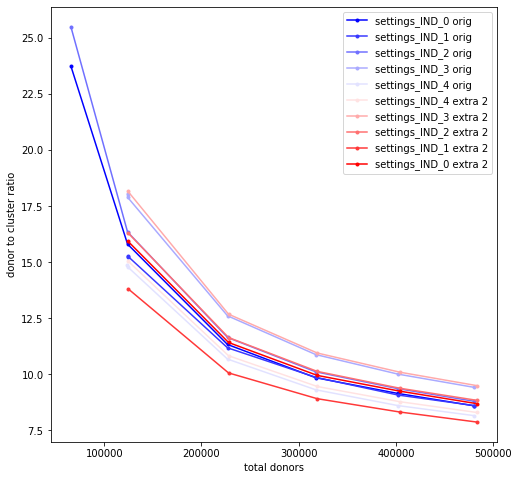

In [55]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('donor to cluster ratio')
plt.legend()

In [19]:
avg_size_sets = []
for i, file in enumerate(files):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    avg_size_sets.append([data_cut['total_donors'].values, data_cut['avg_cluster_size'].values, file[1], color])

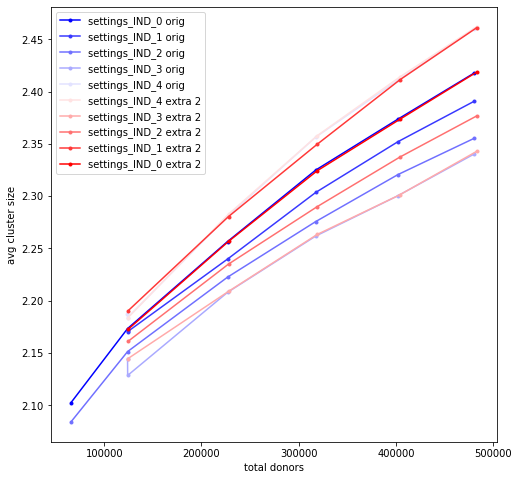

In [20]:
plt.figure(figsize=(8,8))
for s in avg_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('avg cluster size')
plt.legend()

In [21]:
biggest_size_sets = []
for i,file in enumerate(files):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    biggest_size_sets.append([data_cut['total_donors'].values, data_cut['biggest_cluster_size'].values, file[1], color])

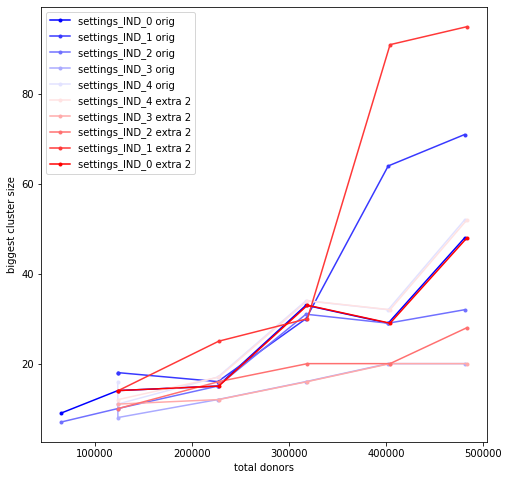

In [22]:
plt.figure(figsize=(8,8))
for s in biggest_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('biggest cluster size')
plt.legend()

In [23]:
total_clusters_sets = []
for i,file in enumerate(files):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    total_clusters_sets.append([data_cut['total_donors'].values, data_cut['total_clusters'].values, file[0], color])

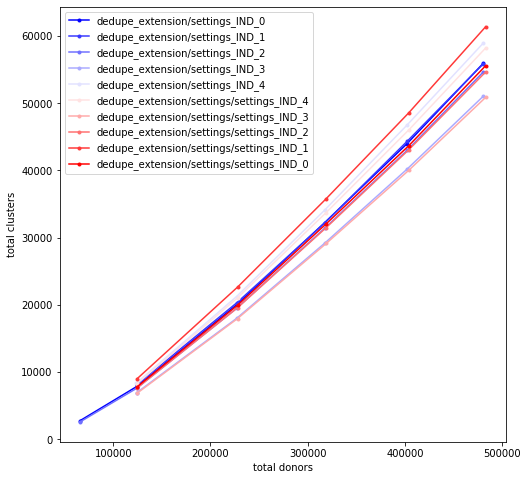

In [24]:
plt.figure(figsize=(8,8))
for s in total_clusters_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('total clusters')
plt.legend()

In [78]:
purple = [cm.Purples(x) for x in [.5,1.0]]
blue = [cm.Blues(x) for x in [.5,.75]]
green = [cm.Greens(x) for x in [.5,.75]]
orange = [cm.Oranges(x) for x in [.5,.75]]
red = [cm.Reds(x) for x in [.5,.75]]

In [79]:
files_grouped = [['dedupe_extension/settings_IND_0','settings_IND_0 orig', purple[0]],
         ['dedupe_extension/settings/settings_IND_0','settings_IND_0 extra 2', purple[1]],
         ['dedupe_extension/settings_IND_1','settings_IND_1 orig', blue[0]],
         ['dedupe_extension/settings/settings_IND_1','settings_IND_1 extra 2', blue[1]],
         ['dedupe_extension/settings_IND_2','settings_IND_2 orig', green[0]],
         ['dedupe_extension/settings/settings_IND_2','settings_IND_2 extra 2', green[1]],
         ['dedupe_extension/settings_IND_3','settings_IND_3 orig', orange[0]],
         ['dedupe_extension/settings/settings_IND_3','settings_IND_3 extra 2', orange[1]],
         ['dedupe_extension/settings_IND_4', 'settings_IND_4 orig', red[0]],
         ['dedupe_extension/settings/settings_IND_4','settings_IND_4 extra 2', red[1]]]

In [80]:
ratio_sets = []
for i, file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    ratio_sets.append([data_cut['total_donors'].values, data_cut['donor_cluster_ratio'].values, file[1], color, file[2]])

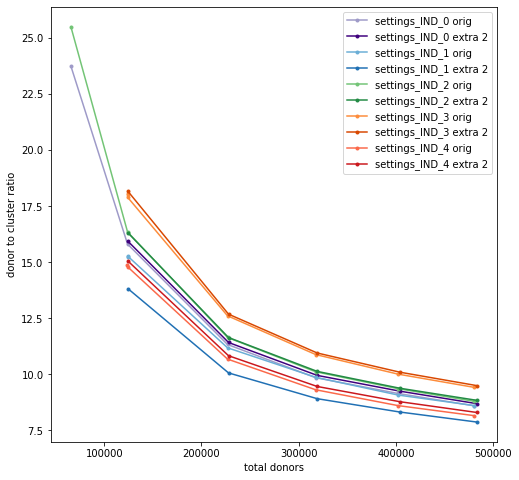

In [81]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[4])
plt.xlabel('total donors')
plt.ylabel('donor to cluster ratio')
plt.legend()

In [82]:
avg_size_sets = []
for i, file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    avg_size_sets.append([data_cut['total_donors'].values, data_cut['avg_cluster_size'].values, file[1], color,file[2]])

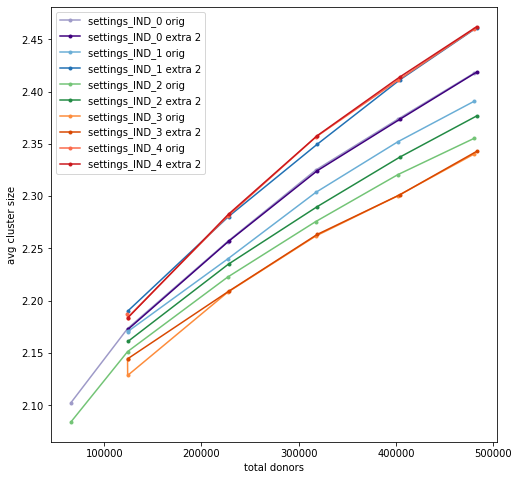

In [83]:
plt.figure(figsize=(8,8))
for s in avg_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[4])
plt.xlabel('total donors')
plt.ylabel('avg cluster size')
plt.legend()

In [84]:
biggest_size_sets = []
for i,file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    biggest_size_sets.append([data_cut['total_donors'].values, data_cut['biggest_cluster_size'].values, file[1], file[2]])

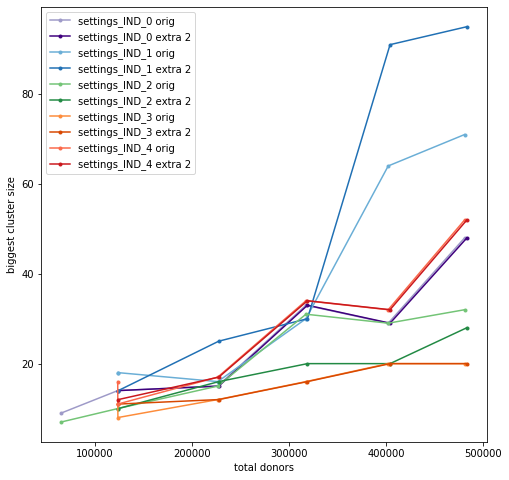

In [85]:
plt.figure(figsize=(8,8))
for s in biggest_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('biggest cluster size')
plt.legend()

In [88]:
total_clusters_sets = []
for i,file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    total_clusters_sets.append([data_cut['total_donors'].values, data_cut['total_clusters'].values, file[1], file[2]])

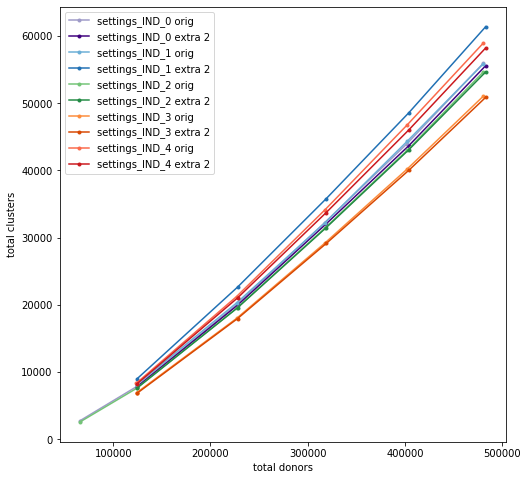

In [89]:
plt.figure(figsize=(8,8))
for s in total_clusters_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('total clusters')
plt.legend()